# Assignment 2: Linear and Logistic Regressions
## BUS 20800: Big Data
## Due: 11:59 am on Apr 15, 2022
## Richard Huang, David Yang, Matthew Zhao

______

## Part I

## Problem 1: **Logistic Loss**



1.1 Calculate the derivative of the Sigmoid function. Can you write the derivative in terms of $\sigma(t)$ ?

$$
\sigma(t) = \frac{e^t}{1+e^t}
$$



**Answer**:<br>

$\displaystyle \frac{\partial}{\partial t} (\sigma(t)) = \frac{(1+e^t)e^{t} - e^{t}(e^{t})}{(1+e^t)^{2}} = \frac{e^{t}}{(1+e^t)^{2}} = \frac{e^{t}}{1+e^t} \cdot \frac{1}{1+e^t} = \frac{1}{1+e^t} \cdot \sigma(t)$

1.2  Recall from the lecture, in linear regression setting, we have:
$$
Minimize \ squared \ loss \iff Minimize \ deviance \iff  Maximize\  likelihood
$$
    
As for the logistic regression, we also have a loss similar to the squared loss, namely logistic loss, defined as:
$$
    L = \sum_{i = 1}^{N} [log(1+e^{\beta^T x_i}) - y_ix_i^T \beta]
$$
    
Show that the following equivalence relationship for logistic regression holds.

$$
Minimize \ logistic \ loss \iff Minimize \ deviance \iff  Maximize\  likelihood
$$

**Answer**:<br>
WTS that the expressions for Logistic Loss ($L$), Deviance ($D$), and Likelihood ($l$) are proportional:<br>
$\displaystyle D  = -2\log{(l)} = $ <br>$\displaystyle -2 \sum_{i=1}^{n} (y_{i}\log{(p_{i})} + (1-y_{i})\log{(1-p_{i})} = -2 \sum_{i=1}^{n} (y_{i}\log{(\frac{e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}})} + (1-y_{i})\log{(1-\frac{e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}})}$<br>
$\displaystyle = -2 \sum_{i=1}^{n} (y_{i}\log{(\frac{e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}})} + (1-y_{i})\log{(\frac{1}{1+e^{x_{i}^{T}\beta}})}$<br>
$\displaystyle = -2 \sum_{i=1}^{n} {y_{i}}\log{(e^{x_{i}^{T}\beta})} - {y_{i}}\log{(1+e^{x_{i}^{T}\beta})} + ({1-y_{i}})\log{(1)} - ({1-y_{i}})\log{(1+e^{x_{i}^{T}\beta})}$<br>
$\displaystyle = -2 \sum_{i=1}^{n} y_{i} x_{i}^{T}\beta  - \log{(1+e^{x_{i}^{T}\beta})}$<br>


<br>
$\displaystyle L = \sum_{i = 1}^{N} [log(1+e^{\beta^T x_i}) - y_ix_i^T \beta] \propto \log{l} = \sum_{i=1}^{n} \log{(\frac{e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}})^{y_{i}} (\frac{1}{1+e^{x_{i}^{T}\beta}})^{1-y_{i}}} = \sum_{i=1}^{n} {y_{i}}\log{(\frac{e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}})} +({1-y_{i}})\log{(\frac{1}{1+e^{x_{i}^{T}\beta}})}$<br>
$\displaystyle = \sum_{i=1}^{n} {y_{i}}\log{(e^{x_{i}^{T}\beta})} - {y_{i}}\log{(1+e^{x_{i}^{T}\beta})} + ({1-y_{i}})\log{(1)} - ({1-y_{i}})\log{(1+e^{x_{i}^{T}\beta})}$<br>
$\displaystyle = \sum_{i=1}^{n} y_{i} x_{i}^{T}\beta  - \log{(1+e^{x_{i}^{T}\beta})}$<br>

Since Logistic Loss and Deviance are proportional to log likelihood, we can conclude that minimizing logistic loss and deviance are equivalent to maximizing likelihood. 

1.3 Calculate the derivative of the log likelihood with respect to weight $\beta$. 



**Answer**:<br>
Derivative wrt $\beta$: 
Given that$\displaystyle = \sum_{i=1}^{n} y_{i} x_{i}^{T}\beta  - \log{(1+e^{x_{i}^{T}\beta})}$ from (1.2), $\displaystyle \frac{\partial \log{(l)}}{\partial \beta} = \sum_{i=1}^{n} y_{i} x_{i}^{T} - \frac{x_{i}^{T}e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}}$<br>
$\displaystyle = \sum_{i=1}^{n} x_{i}^{T} (y_{i}  - \frac{1}{1+e^{-x_{i}^{T}\beta}})$

1.4 Redo the exercise 1.3 but with logistic loss, are the results the same?

**Answer**:<br>
Derivative wrt $\beta$: 
Given that $L \displaystyle = \sum_{i = 1}^{N} [log(1+e^{\beta^T x_i}) - y_ix_i^T \beta]$, $\displaystyle \frac{\partial L}{\partial \beta} = \sum_{i=1}^{n} \frac{x_{i}^{T}e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}} - y_{i} x_{i}^{T}$<br>
$\displaystyle = \sum_{i=1}^{n} x_{i}^{T} (\frac{1}{1+e^{-x_{i}^{T}\beta}}  - y_{i})$

______

## Problem 2: **Classification via Logistic Regression** 


2.1 Logistic regression is a popular linear classifier, that assigns a label 0 or 1 to individuals. Show the following equivalence: 
$$
{\beta}^T x>0\iff P(Y = 1|X = x)> P(Y=0|X=x),   \nonumber
$$

which implies that the decision boundray of a logistic regression is 
$$
{\beta}^T x = 0.
$$



**Answer**:<br>
$P(Y=1|X) = \displaystyle \frac{e^{x_{i}^{T}}}{1+e^{x_{i}^{T}}}$<br>
$P(Y=0|X) = 1-P(Y=1|X)$<br>
$P(Y=0|X) = 1- \displaystyle \frac{e^{x_{i}^{T}}}{1+e^{x_{i}^{T}}} = \frac{1}{1+e^{x_{i}^{T}}}$<br>
$P(Y=1|X=x) > P(Y=0|X=x) \Rightarrow  \displaystyle \frac{e^{x_{i}^{T}}}{1+e^{x_{i}^{T}}} > 1- \frac{e^{x_{i}^{T}}}{1+e^{x_{i}^{T}}}$<br>
$\Rightarrow \displaystyle e^{x_{i}^{T}} > 1 + e^{x_{i}^{T}} - e^{x_{i}^{T}} \Rightarrow \log{(e^{x_{i}^{T}})} > \log{(1)} \Rightarrow x_{i}^{T} > 0$

______

# Part II

In [30]:
# Set up codes
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, rc={'figure.figsize':(15,8)}, font_scale=1.2)
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_moons, make_circles, make_blobs


## Problem 3: Understanding the decision boundary



This exercise helps you visualize the decision boundary of a binary classification problem. 

### Part 1. Data Generating Process

We first generate five distinct datasets used in this execise for you. You don't need modify any codes here.

In [2]:
# DGP
random_seed = np.random.seed(0)

n_samples   = 1500

# Generate 2-dimensional x variables and y lables that follow a standard linear logistic regression model. Half of 
# the y labels are 1s. 
balanced    = make_blobs(n_samples=n_samples, random_state=random_seed, centers=2, center_box = (-4,4))

# Generate circle shaped data
noisy_circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# Generate Moon shaped data
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)

# Generate 2-dimensional random x variables with randomly generated labels
label = [0] * n_samples
for i in np.random.randint(0,n_samples,int(n_samples/2)):
    label[i] = 1
    
no_structure = np.random.rand(n_samples, 2), label

# Generate 2-dimensional x variables and y lables that follow a standard linear logistic regression model. In this DGP,
# the y-labels are rather imbalanced, that is, 100 y labels are 1s, whereas 1500 labels are 0s.
imbalanced = make_blobs(n_samples = [n_samples, 100],random_state = random_seed, cluster_std = [1.5,0.1],center_box = (-3,3))


from Logistic_simulation import Generate_data

# Prepare data in dataframe format for the following analysis.
df_circle       = Generate_data(noisy_circles)
df_moon         = Generate_data(noisy_moons)
df_balanced     = Generate_data(balanced)
df_no_structure = Generate_data(no_structure)
df_imbalanced   = Generate_data(imbalanced)

Run the following cell to visualize the data generated above.

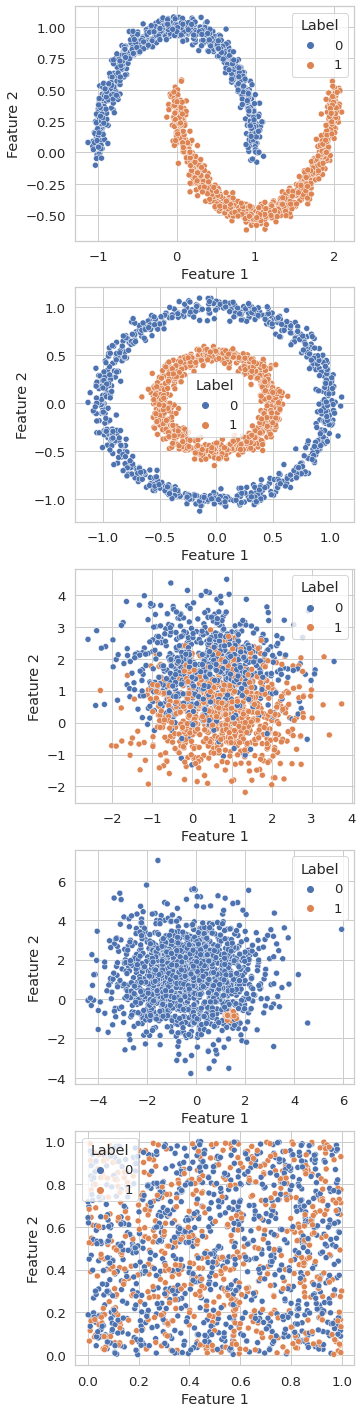

In [3]:
# Input data visualization
plt.figure(figsize = (5,25))

# Moon shape dataset
plt.subplot(5,1,1)
sns.scatterplot('Feature 1', 'Feature 2', hue = 'Label', data = df_moon)

# Circle shape dataset
plt.subplot(5,1,2)
sns.scatterplot('Feature 1', 'Feature 2', hue = 'Label', data = df_circle)

# Balanced dataset
plt.subplot(5,1,3)
sns.scatterplot('Feature 1', 'Feature 2', hue = 'Label', data = df_balanced)

# No structure dataset
plt.subplot(5,1,5)
sns.scatterplot('Feature 1', 'Feature 2', hue = 'Label', data = df_no_structure)

# Imbalanced dataset
plt.subplot(5,1,4)
sns.scatterplot('Feature 1', 'Feature 2', hue = 'Label', data = df_imbalanced)

plt.show()

### Part 2. Verify Gradients

In this section, we implement and verify the gradient formula derived in Part I. We will use this gradient later in Part 3 to implement logistic regression on our own.




Please finish the Get_gradient_formula in Logistic_simulation.py before running the next cell.

In [4]:
from Logistic_simulation import Get_gradient_formula, mapFeature


Let's calculate gradient using any dataset generated from above. 


In [5]:
# First, choose the x variables from a dataset, e.g., df_balanced. Make sure the dimension of X is 1500 x 2 or 1600 x 2 
# and the dimension of y is 1500 x 1 or 1600 x 1. Pick an arbitrary 2x1 vector theta, at which point you evaluate the 
# gradients.

X = np.array(df_balanced[['Feature 1','Feature 2']])
X.shape = (1500,2)
y = np.array(df_balanced['Label']).transpose()
y.shape = (1500,1)

theta = np.array([[1,2]]).T
theta

array([[1],
       [2]])

In [6]:
# Evaluate gradient of the log likelihood (function of data) at theta:  

gradient_formula = Get_gradient_formula(theta, X, y)
gradient_formula

array([[ 213.81133456],
       [1327.7198756 ]])

Recall that the gradient is defined as:

$$
\nabla_x = \frac{\partial f(x,\cdots)}{\partial x} =\lim_{h\to 0} \frac{f(x+h,\cdots)-f(x-h,\cdots)}{2h}
$$

Now we use this method for check your results. Run the following cell to compare gradient_formula and gradient_numeric below.

In [7]:
from Logistic_simulation import Get_gradient_numeric, Gradient_check
# Run these codes to check your answer. 
gradient_numeric = Get_gradient_numeric(theta, X, y)

Gradient_check(gradient_formula,gradient_numeric)

1.1058550099620814e-06

### Part 3. Visualize the Decision Boundary

With the above preparation, we are ready to visualize the decision boundary. 

In [15]:
# Visualize the decision boundary
from Logistic_simulation import Generate_boundary

Choose an appropriate degree (e.g., 1, 2, ...) to run logistic regression with $x_1$, $x_2$, $x_1^2$, $x_2^2$, ...., $x_1^{degree}$, $x_2^{degree}$ and their cross products as regressors $x$ for each dataset, respectively. If you choose the right degree, the lables will be seperated by the hyperplane $x^T \beta = 0$.  

In [16]:
# Balanced dataset
degree = 1
Generate_boundary(df_balanced,degree)

NameError: name 'X' is not defined

In [ ]:
# Imbalanced dataset
degree = 
Generate_boundary(df_imbalanced,degree)

In [ ]:
# Circle dataset
degree = 
Generate_boundary(df_circle,degree)

In [ ]:
# Moon dataset
degree = 
Generate_boundary(df_moon,degree)

In [ ]:
# Dataset without structure
degree = 
Generate_boundary(df_no_structure,degree)

What conclusions can you make?

**Answer**:

______

## Problem 4: Default Prediction

### Background

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub used to be the world's largest peer-to-peer lending platform before it closed this business.


The data given contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


When a person applies for a loan, there are two types of decisions that could be taken by the company:
* **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

 1. Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
 2. Current: Applicant is in the process of paying the instalments. These candidates are not labelled as 'defaulted'.
 3. Charged-off: Applicant has not paid the installments in due time for a long period of time, i.e. he/she has defaulted on the loan


* **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transnational history of those applicants with the company and so this data is not available with the company (and thus not in this dataset)


In this exercise, you will work as a group of data scientists for LendingClub to find out the driving factors behind loan default. And use these variables to identify risky loan applicants.

We will mainly focus on the binary classification case for simplicity, 'Fully Paid' and 'Charged Off'. 

And for each variable, you can see its description in Variable_description.pdf.


In [244]:
# Load training data
_DATA_DIR = "/classes/2080001_spr2022/Data/"
loan_data = pd.read_csv('%s/loan_train.csv'%(_DATA_DIR), index_col =0)
loan_test = pd.read_csv('%s/loan_test.csv'%(_DATA_DIR), index_col =0)

In [191]:
loan_data.shape

(1487286, 28)

In [192]:
# checking intersection of columns
len(list(set(loan_test.columns).intersection(loan_data.columns)))

27

In [193]:
loan_test["addr_state"]

31011     WA
87620     OK
36693     SD
54179     TX
4619      VA
          ..
102222    GA
159648    AR
103589    MN
39884     GA
69451     VA
Name: addr_state, Length: 371822, dtype: object

### Part 1: Exploratory Data Analysis

1. It is easier to write functions to visualize different types of data. Finish these functions in EDA.py, Get_category_visualize, Get_numeric_visualize, Get_map_visualize(df =loan_data, x = 'addr_state',y ='loan_status'), Get_text_visualize. Use these functions to visualize the data.


In [194]:
# Visualize categorical data

from EDA import Get_category_visualize

# Here x = grade is just for your reference
Get_category_visualize(df = loan_data, x = 'grade', y = 'loan_status')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-194-5fbfb87fd9ec>", line 3, in <module>
    from EDA import Get_category_visualize
ModuleNotFoundError: No module named 'EDA'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ModuleNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1148, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.6/site-pac

ModuleNotFoundError: No module named 'EDA'

In [ ]:
# Visualize numerical data
from EDA import Get_numeric_visualize

# Here x = int_rate is just for your reference
Get_numeric_visualize(df = loan_data, x = 'int_rate', y = 'loan_status')

In [31]:
import pandas as pd
import plotly.graph_objects as go
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['total exports'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = '2011 US Agriculture Exports by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [32]:
!pwd

/home/davidyangnyc/busn-20800


In [ ]:
fig

In [ ]:

def Get_map_visualize(df, x = 'addr_state',y ='loan_status'):
    '''
       Using map plot to visualize spatial data

       Input:
       df    :  DataFrame, loan_data here
       x     : 'addr_state', spatial information
       y     :  Label, loan_status here

       Output:
       The map for specific variable x respect to default group
       '''

    ##############################################################################
    ### TODO: Get the map plot                                                 ###
    ##############################################################################
    

    ##############################################################################
    #                               END OF YOUR CODE                             #
    ##############################################################################
Get_map_visualize(df =loan_data, x = 'addr_state',y ='loan_status')

In [ ]:
# Visualize spatial data
from EDA import Get_map_visualize
Get_map_visualize(df =loan_data, x = 'addr_state',y ='loan_status')

In [ ]:
# Visualize text data
from EDA import Get_text_visualize

# Here x = emp_title is just for your reference
Get_text_visualize(df = loan_data,x = 'emp_title' ,y = 'loan_status')

Based on the EDA, could you answer the following questions?

 + Does this dataset has balanced labels?
 + For the numerical type in this dataset, is there some strong co-linearity?
 + Which state has the highest default rate? How about the lowest?
 + Which job is associated with highest default rate?
 + What pattern can you find in loan grade and loan status?
 + Which year has the highest total amount of loans issued?
 + Which variables might be good indicators for loan default?

### Part 2: Data Cleaning

2. Here we offer you an example how we do the cleaning procedure on each variable. You can have your own cleaning procedure.

In [245]:
# Missing values
# Look at the percentage of missing values for each variable
loan_data.isna().sum(axis = 0)/ loan_data.shape[0] * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.993611
emp_length              6.230678
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   1.153376
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.075036
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                2.541677
pub_rec_bankruptcies    0.037989
loan_status             0.000000
dtype: float64

In [246]:
# Emp_title, Title have too many categories, not suitable for construct dummy variable
# Delete these two variabls
print(len(loan_data.emp_title.unique()))
print(len(loan_data.title.unique()))

loan_data.drop(columns = ['emp_title','title'],axis = 1, inplace=True)

383625
50998


In [247]:
# Change term value from categorical to numerical value
term_values = {' 36 months': 36, ' 60 months': 60}
loan_data['term'] = loan_data.term.map(term_values)

In [248]:
# Change employment length from categorical into numerical value
emp_length_values = {'< 1 year': 0, 
                     '1 year': 1,
                     '2 years' :2,
                     '3 years' : 3,
                     '4 years' : 4,
                     '5 years' : 5,
                     '6 years' : 6,
                     '7 years' : 7,
                     '8 years' : 8,
                     '9 years' : 9,
                     '10+ years' : 10}
loan_data['emp_length'] = loan_data.emp_length.map(emp_length_values)

In [249]:
# Varriable grade offers the same information as sub_grade
loan_data.drop(columns = ['grade'], inplace = True)

In [250]:
# Zip code offers the same information as addr_state
loan_data.drop(columns = ['zip_code'], inplace = True)

In [251]:
# Get dummy variable, be careful with the colinearity
dummy_col = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership','addr_state']
loan_data = pd.get_dummies(loan_data, columns=dummy_col, drop_first=True)

In [252]:
# Issue_d has the data leakage problem, wa can't get access to the issuance date until we know its true loan_status
loan_data.drop('issue_d', axis=1, inplace=True)

In [253]:
# Care about year information, not month
loan_data['earliest_cr_line'] = loan_data.earliest_cr_line.apply(lambda x: int(x[-4:]))

In [254]:
# For variable mort_acc, fill the missing value with median
loan_data.mort_acc.fillna(loan_data.mort_acc.median(), inplace = True)

In [255]:
# Drop the other missing values
loan_data.dropna(inplace = True)

In [256]:
# Change predicted value into binary numerical value 0,1
status_values = {'Fully Paid': 0, 'Charged Off': 1}
loan_data['loan_status'] = loan_data.loan_status.map(status_values)

In [257]:
# turn int_rate,revol_util into numeric
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'].str.strip('%'))
loan_data['revol_util'] = pd.to_numeric(loan_data['revol_util'].astype('str').str.strip('%'))

### Part 3: Logistic Regression

In [258]:
y = loan_data.loan_status.to_numpy()
X = loan_data.drop('loan_status',axis = 1).to_numpy()

Please finish the codes in Logistic_regression.py. 

In [259]:
# Perform the logistic regression
import statsmodels.api as sm
from Logistic_regression import Logistic_regression
p_value, result = Logistic_regression(X,y)

Optimization terminated successfully.
         Current function value: 0.443545
         Iterations 7


To evaluate the performance of your model, we use a separate dataset. Again, you should first clean this dataset similar to Part 2.

In [260]:
X_test = loan_test

In [261]:
# Data cleaning procedure for X_test
X_test.isna().sum(axis = 0)/ X_test.shape[0] * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               7.074084
emp_length              6.297368
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   1.142213
zip_code                0.000269
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.074229
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                2.549338
pub_rec_bankruptcies    0.035501
dtype: float64

In [262]:
X_test.drop(columns = ['emp_title','title'],axis = 1, inplace=True)

In [263]:
term_values = {' 36 months': 36, ' 60 months': 60}
X_test['term'] = X_test.term.map(term_values)

In [264]:
emp_length_values = {'< 1 year': 0, 
                     '1 year': 1,
                     '2 years' :2,
                     '3 years' : 3,
                     '4 years' : 4,
                     '5 years' : 5,
                     '6 years' : 6,
                     '7 years' : 7,
                     '8 years' : 8,
                     '9 years' : 9,
                     '10+ years' : 10}
X_test['emp_length'] = X_test.emp_length.map(emp_length_values)

In [265]:
X_test.drop(columns = ['grade'], inplace = True)
X_test.drop(columns = ['zip_code'], inplace = True)
dummy_col = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership','addr_state']
X_test = pd.get_dummies(X_test, columns=dummy_col, drop_first=True)
X_test.drop('issue_d', axis=1, inplace=True)

In [266]:
X_test['earliest_cr_line'] = X_test.earliest_cr_line.apply(lambda x: int(x[-4:]))
X_test.mort_acc.fillna(X_test.mort_acc.median(), inplace = True)

In [267]:
X_test.dropna(inplace = True)

In [269]:
X_test['int_rate'] = pd.to_numeric(X_test['int_rate'].str.strip('%'))
X_test['revol_util'] = pd.to_numeric(X_test['revol_util'].astype('str').str.strip('%'))

You may notice, for the test data, you don't have access to the true label. 

Simply output your prediction based on the test data, y_pred, and we will calculate the accuracy for you.

In [297]:
# OOS prediction
y_pred = result.predict(X_test)
y_pred = y_pred.apply(lambda x: int(x+0.5))

In [298]:
# Run this to save the data and upload this table.
y_pred.to_csv()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-298-a8d366b51878>", line 2, in <module>
    y_pred.to_csv('result.csv')
  File "/usr/local/lib64/python3.6/site-packages/pandas/core/generic.py", line 3170, in to_csv
    formatter.save()
  File "/usr/local/lib64/python3.6/site-packages/pandas/io/formats/csvs.py", line 190, in save
    compression=dict(self.compression_args, method=self.compression),
  File "/usr/local/lib64/python3.6/site-packages/pandas/io/common.py", line 493, in get_handle
    f = open(path_or_buf, mode, encoding=encoding, errors=errors, newline="")
OSError: [Errno 116] Stale file handle: 'result.csv'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2044, in sho

OSError: [Errno 116] Stale file handle: 'result.csv'

**<font color = red>[Bonus question]**: Now it's time to review the results you have obtained. Does your result make sense? If not, what problems do you find, and any ideas about how to fix them?
    
**Answer**: